In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import colorsys

In [2]:
# Читаем несколько файлов с метриками (для разных авторов)
df1 = pd.read_csv('dataset_part1.csv', sep=',') 
df1.index = df1['Unnamed: 0']
df1['author'].unique()

array(['anton-chekhov', 'dmitriy-mamin-sibiryak', 'fedor-dostoevskii',
       'ivan-goncharov', 'ivan-turgenev', 'lev-tolstoi'], dtype=object)

In [3]:
df2 = pd.read_csv('dataset_part2.csv', sep=',')
df2.index = df2['Unnamed: 0']
df2['author'].unique()

array(['lev-tolstoi', 'maksim-gorkii'], dtype=object)

In [4]:
df3 = pd.read_csv('dataset_part3.csv', sep=',')
df3.index = df3['Unnamed: 0']
df3['author'].unique()

array(['maksim-gorkii', 'nikolai-gogol', 'sergey-aksakov'], dtype=object)

In [5]:
#Делаем общий датасет для всех авторов
df = df1.append(df2).append(df3)

In [6]:
df['author'].unique()

array(['anton-chekhov', 'dmitriy-mamin-sibiryak', 'fedor-dostoevskii',
       'ivan-goncharov', 'ivan-turgenev', 'lev-tolstoi', 'maksim-gorkii',
       'nikolai-gogol', 'sergey-aksakov'], dtype=object)

In [7]:
#Удаляем одинаковые строки в объединенном датасете
df = df.drop_duplicates(['Unnamed: 0'])
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.describe()

,n_sents,n_words,n_unique_words,n_long_words,n_complex_words,n_simple_words,n_monosyllable_words,n_polysyllable_words,n_chars,n_letters,...,mtld,mamtld,hdd,simpson_index,hapax_index,1per,2per,futr,past,pssv
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2.036000e+03,2036.000000,...,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,1824.000000,1679.000000,1812.000000,2015.000000,1911.000000
mean,129.905697,2319.201375,943.064342,959.969057,326.750982,1851.349705,700.290766,1477.809921,1.463957e+04,11514.990177,...,197.577736,178.041701,0.888772,167.305318,1351.187836,89.879934,54.371054,30.041391,251.346402,16.774987
std,327.975848,6608.464037,1558.548883,3000.992001,1036.824003,5272.056270,1824.574326,4496.687108,4.370152e+04,34642.677192,...,82.880087,97.510938,0.169669,51.547013,307.675386,207.765674,126.486720,64.579094,794.235672,58.574977
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,7.000000e+00,7.000000,...,0.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,614.250000,375.000000,255.750000,83.000000,479.000000,170.000000,391.750000,3.905250e+03,3089.500000,...,141.719006,126.037215,0.895151,141.977478,1191.471162,13.000000,7.000000,5.000000,59.500000,4.000000
50%,63.000000,1131.500000,617.500000,476.000000,161.000000,890.000000,325.500000,720.500000,7.146000e+03,5595.500000,...,184.227211,177.590762,0.907327,163.445148,1320.332311,33.000000,20.000000,12.000000,129.000000,8.000000
75%,126.000000,2001.000000,994.000000,845.000000,291.000000,1591.500000,619.500000,1278.250000,1.256675e+04,9976.250000,...,239.153639,232.670872,0.917278,189.706356,1468.576565,85.000000,53.000000,29.000000,224.000000,16.000000
max,7286.000000,170197.000000,33087.000000,80175.000000,27654.000000,135233.000000,44097.000000,118790.000000,1.147321e+06,911997.000000,...,705.740000,718.113462,0.983501,1242.500000,6386.841303,3306.000000,2197.000000,1096.000000,21769.000000,1603.000000


In [9]:
#Показатели среднего/женского/мужского рода, пассивного/активного залога и т.д. выражаем как долю от общего числа слов в главе
for column in ['neut',
       'masc', 'femn', 'plur','sing', 'pres', 'past', 'futr', 'pssv', 'actv', '2per',
       '3per', '1per']:
    df[column] = df[column] / df['n_words']

In [36]:
df['author'].value_counts()

lev-tolstoi               747
ivan-turgenev             333
fedor-dostoevskii         279
nikolai-gogol             206
anton-chekhov             186
maksim-gorkii             100
dmitriy-mamin-sibiryak     96
ivan-goncharov             57
sergey-aksakov             32
Name: author, dtype: int64

In [27]:
#Удаляем некоторые метрики
books = df.drop(['n_sents', 'n_words', 'n_unique_words', 'n_long_words',
       'n_complex_words', 'n_simple_words', 'n_monosyllable_words',
       'n_polysyllable_words', 'n_chars', 'n_letters', 'n_spaces',
       'n_syllables', 'n_punctuations', 'Unnamed: 20'], axis=1)
books = books.dropna()

In [28]:
books.isna().sum()

flesch_kincaid_grade           0
flesch_reading_easy            0
coleman_liau_index             0
smog_index                     0
automated_readability_index    0
lix                            0
femn                           0
masc                           0
neut                           0
plur                           0
sing                           0
pres                           0
actv                           0
3per                           0
ttr                            0
rttr                           0
cttr                           0
httr                           0
sttr                           0
mttr                           0
dttr                           0
mattr                          0
msttr                          0
mtld                           0
mamtld                         0
hdd                            0
simpson_index                  0
hapax_index                    0
author                         0
1per                           0
2per      

In [29]:
books.describe()

,flesch_kincaid_grade,flesch_reading_easy,coleman_liau_index,smog_index,automated_readability_index,lix,femn,masc,neut,plur,...,mtld,mamtld,hdd,simpson_index,hapax_index,1per,2per,futr,past,pssv
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,...,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,8.464029,54.914002,5.425218,14.487367,5.425218,61.205096,0.151956,0.224551,0.076602,0.115355,...,208.271523,206.961330,0.907741,170.619908,1352.390913,0.034141,0.018542,0.011212,0.110153,0.006816
std,5.377576,17.273481,3.886446,4.105450,3.886446,11.899736,0.045829,0.050338,0.020422,0.035219,...,75.662334,77.010016,0.015865,35.890512,199.229517,0.024089,0.014181,0.006879,0.029358,0.004036
min,-1.191449,-227.454177,-5.542377,5.420938,-5.542377,35.163549,0.043478,0.067449,0.022508,0.032293,...,56.017076,1.000000,0.836224,57.868987,854.351986,0.000712,0.000189,0.000693,0.015351,0.000331
25%,5.561805,47.831850,3.211995,11.951936,3.211995,54.626358,0.119492,0.187216,0.062933,0.091489,...,154.760723,155.951945,0.899393,148.080432,1217.270732,0.015446,0.007369,0.006422,0.095629,0.003976
50%,7.785527,56.672433,5.096831,14.091313,5.096831,59.925776,0.145521,0.225476,0.074393,0.110428,...,195.462673,193.924597,0.909187,166.895697,1327.152316,0.029113,0.015179,0.010143,0.112782,0.006098
75%,10.279917,64.328476,7.102664,16.229013,7.102664,65.778175,0.179608,0.258110,0.087444,0.133816,...,249.773230,246.268601,0.918172,191.386049,1458.573469,0.048142,0.026900,0.014618,0.129872,0.008760
max,112.874892,99.804315,66.789872,48.474994,66.789872,272.991342,0.387059,0.397039,0.156522,0.287169,...,648.686694,718.113462,0.950874,358.589521,2550.764484,0.152493,0.082192,0.068269,0.198142,0.042770


In [30]:
sns.set(rc={'figure.figsize':(15,10)})

def metrics_density_by_author(m):
  for author in books['author'].unique():
    snsplot = sns.kdeplot(books[books['author']==author][m], shade=True, label=author)
    fig = snsplot.get_figure()
    plt.legend()

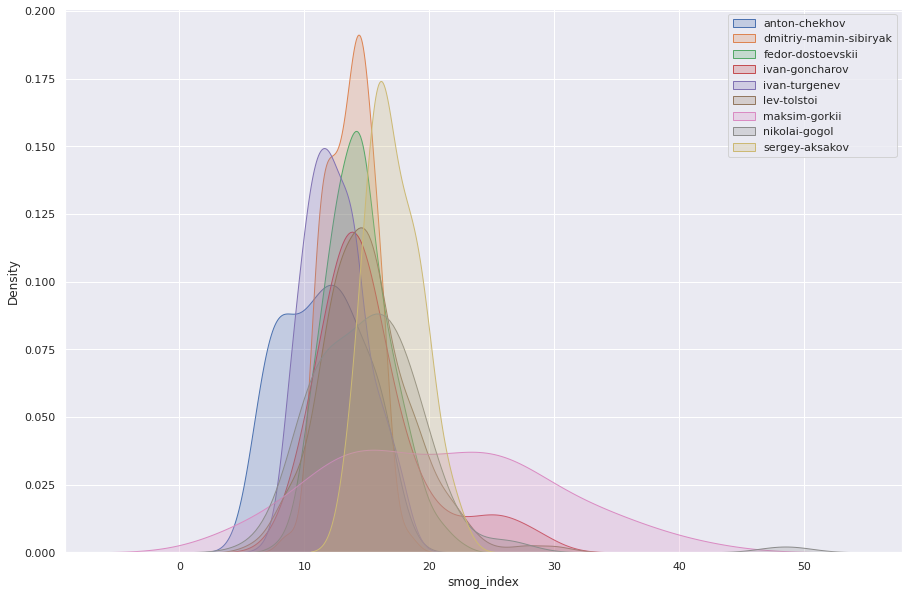

In [31]:
metrics_density_by_author('smog_index')

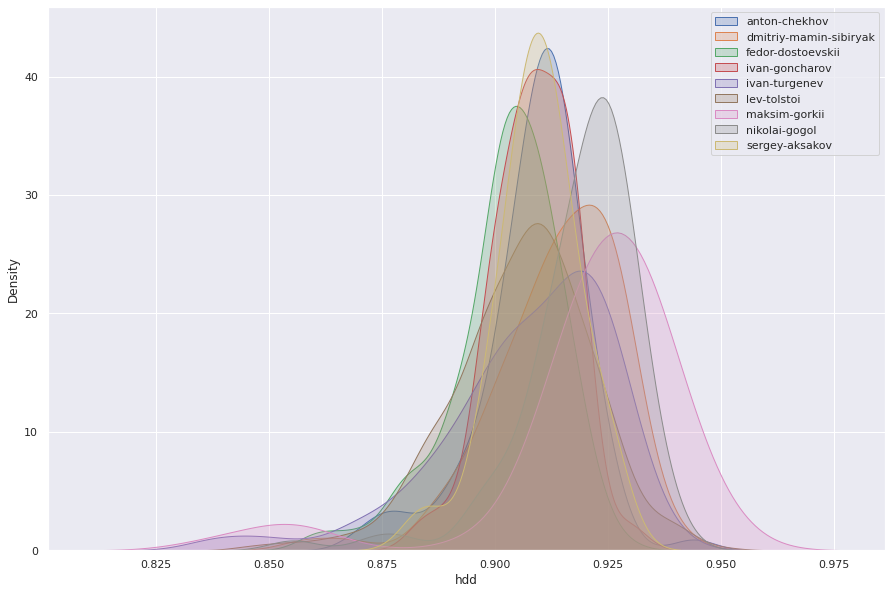

In [32]:
metrics_density_by_author('hdd')

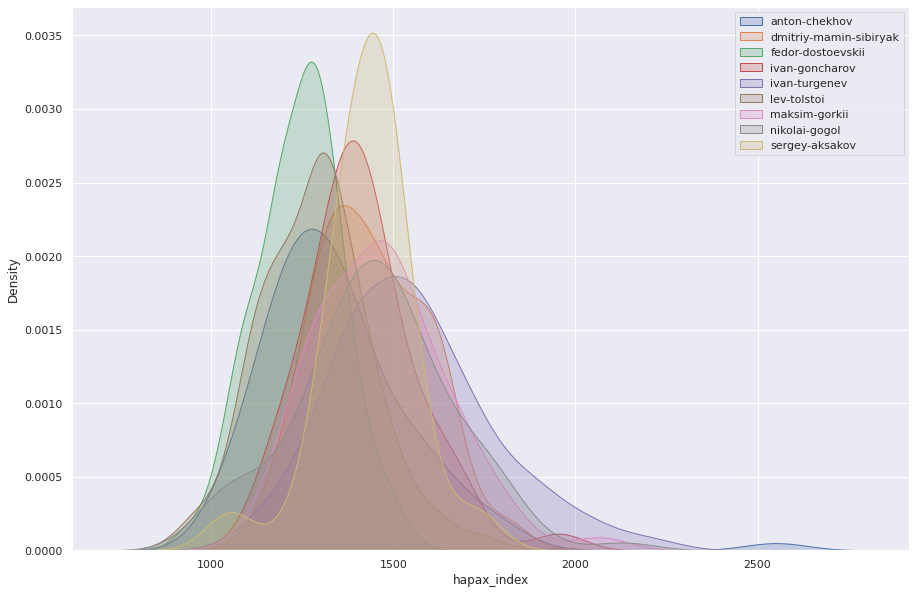

In [33]:
metrics_density_by_author('hapax_index')

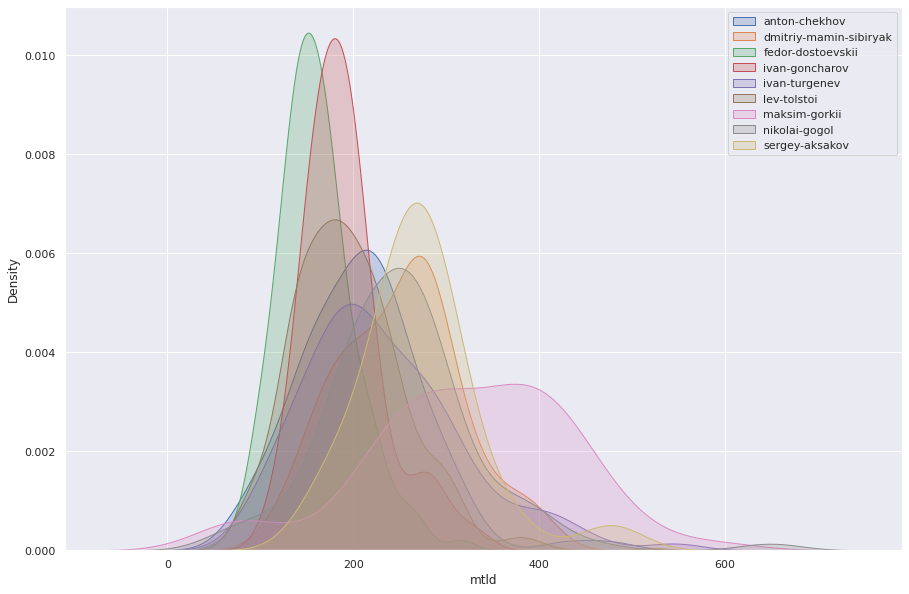

In [34]:
metrics_density_by_author('mtld')

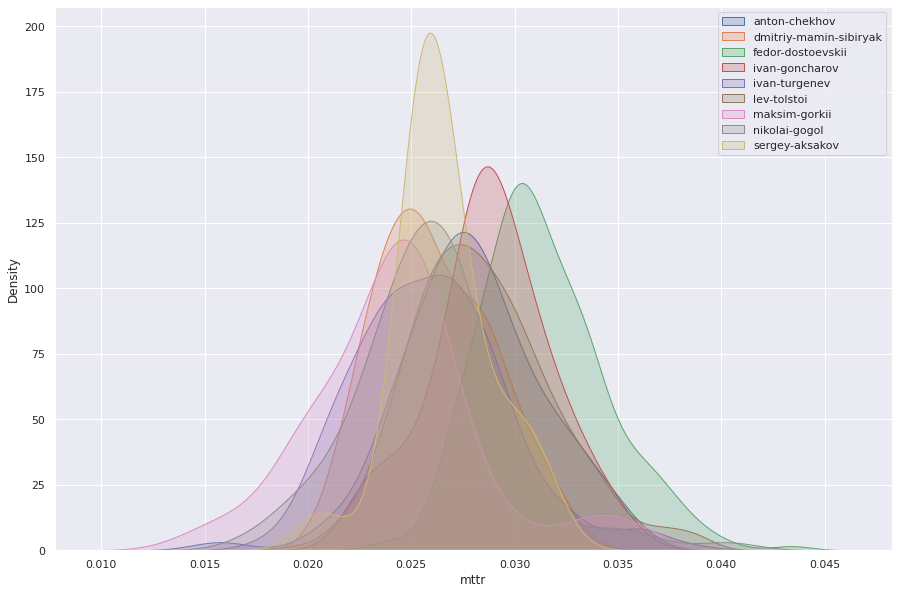

In [35]:
metrics_density_by_author('mttr')

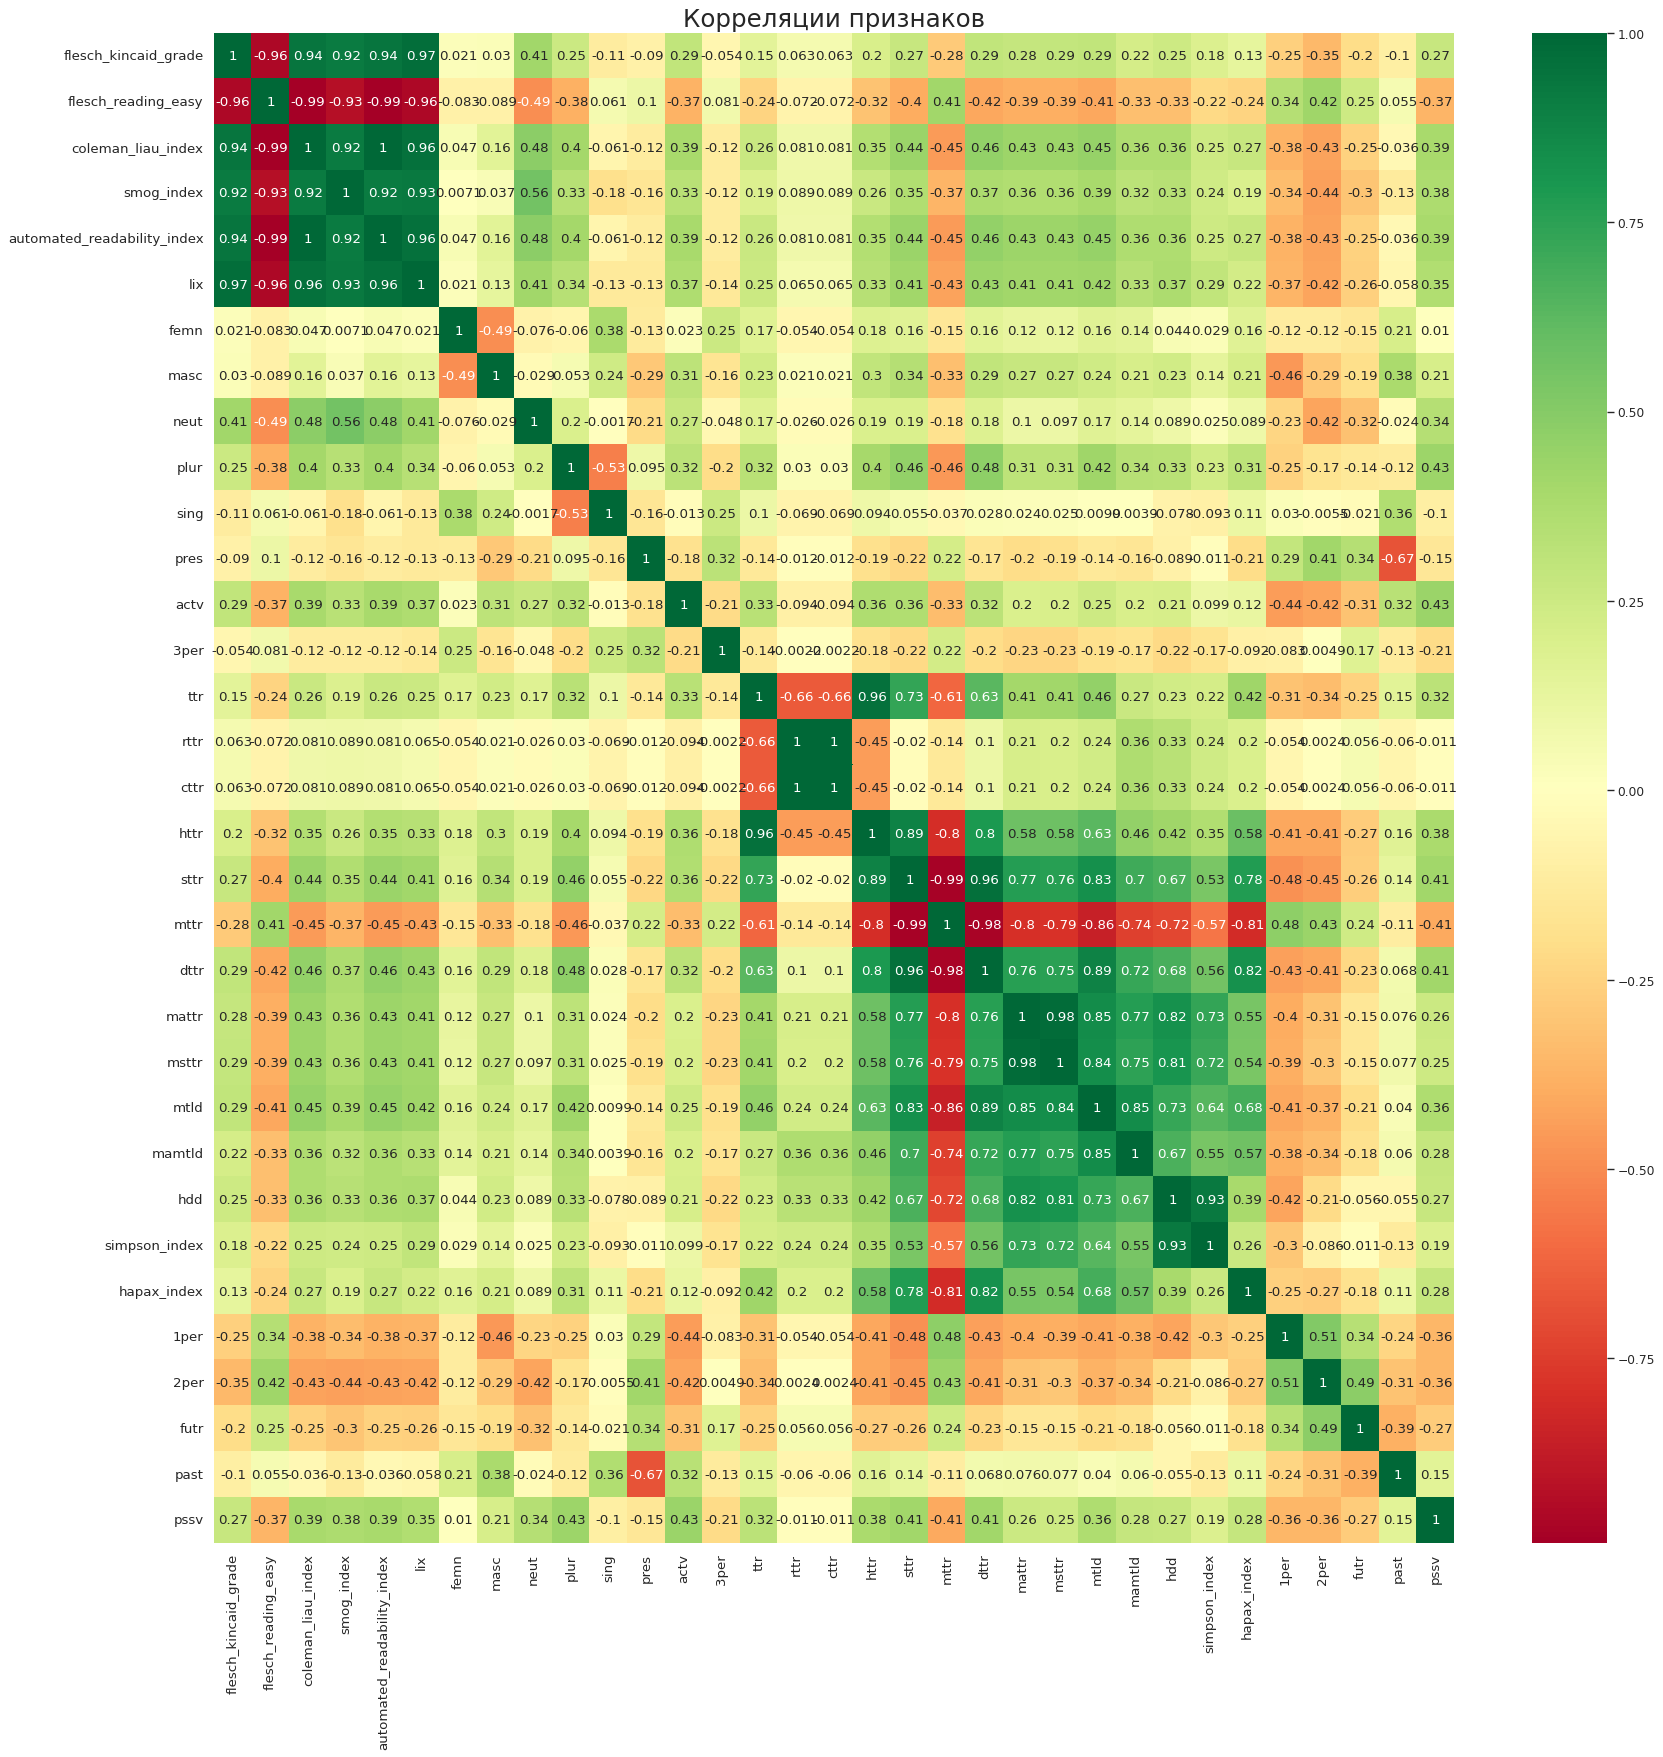

In [37]:
plt.figure(figsize=(25,25), dpi= 80)
sns.heatmap(books.corr(), xticklabels=books.corr().columns, yticklabels=books.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляции признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

* Судя по корреляциям, **метрики удобочитаемости текста** дают очень похожие результаты между собой, поэтому есть смысл оставить только какую-либо одну вместо всех. Можно оставить только **smog_index**. Чем больше значение этой метрики, тем сложнее текст.

* Также метрики лексического разнообразия похожи между собой, но среди них есть не только совсем одинаковые. Можно оставить такие:
  * **hdd** Наиболее достоверная реализация алгоритма VocD (2010, McCarthy & Jarvis). В основе алгоритм лежит метод случайного отбора из текста сегментов длиной от 32 до 50 слов и вычисления для них TTR с последующим усреднением.
  * **hapax_index** Гапакс - слово, встретившееся в тексте только один раз. Гапаксы того или иного автора нередко используют для атрибуции ему некоторого другого произведения, где встречаются такие слова.
  * **mtld** Модификация метрики MSTTR (2005, McCarthy). В данном алгоритме исходный текст делится на сегменты со значением TTR равным 0.72. Значение метрики вычисляется путем деления количества слов на количество получившихся сегментов. Доработанная версия алгоритма предполагает два прохода по тексту - в прямом и обратном порядке, и дальнейшее усреднее значения метрики (2010, McCarthy & Jarvis).
  * **mttr** Модификация метрики TTR с использованием логарифмической функции (1966, Mass). Наиболее стабильная метрика в отношении длины текста.



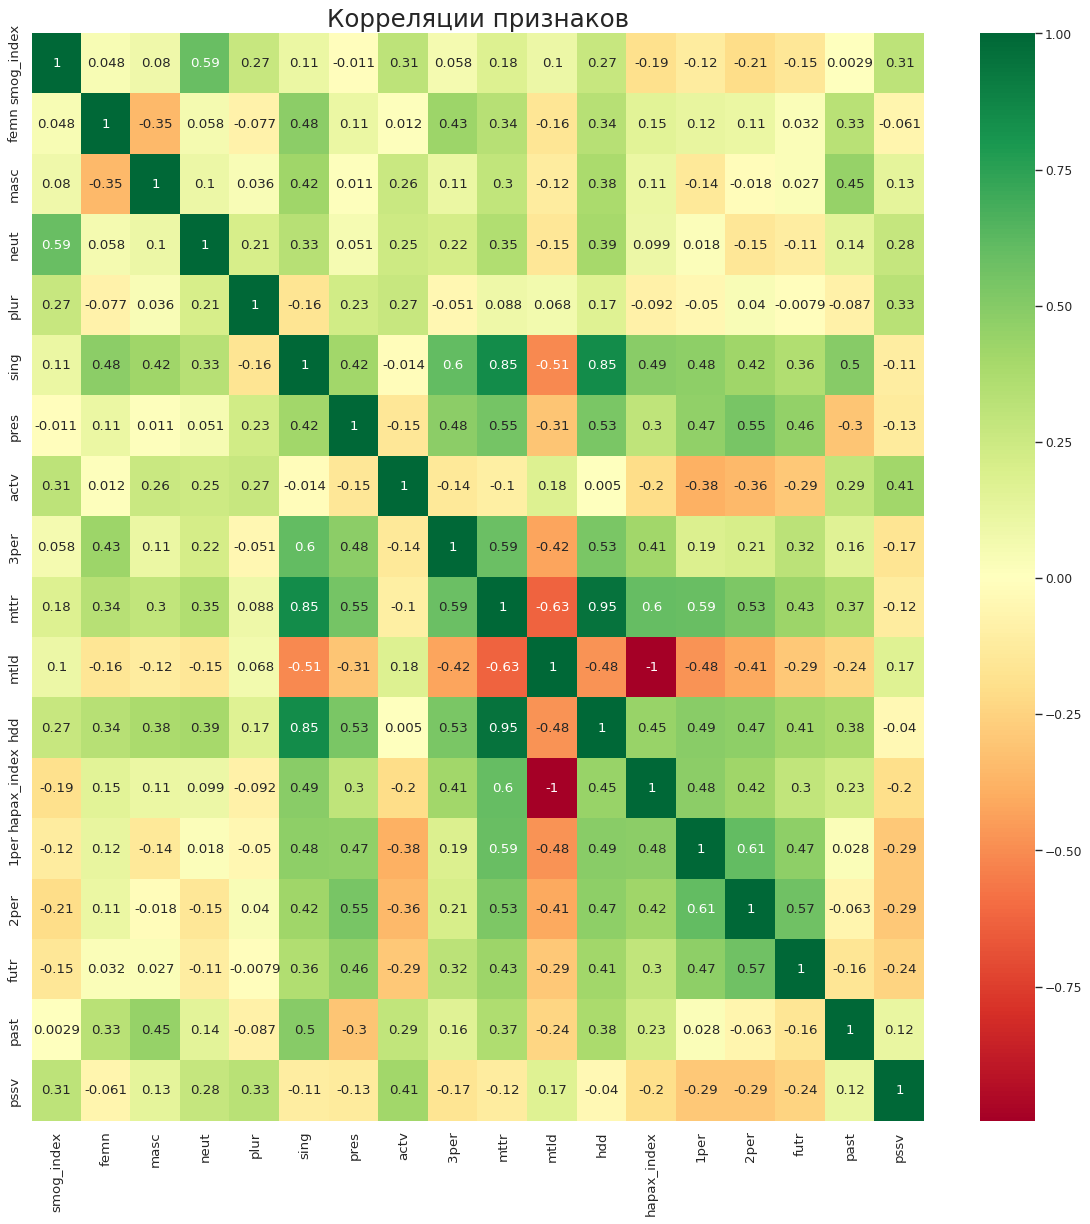

In [38]:
#Удалим ненужные столбцы
books = books.drop(['flesch_kincaid_grade', 'flesch_reading_easy', 'coleman_liau_index', 'automated_readability_index',
                    'ttr', 'rttr', 'cttr', 'httr', 'sttr', 'dttr', 'mattr', 'msttr', 'mamtld', 
                    'simpson_index', 'lix'], axis=1)

authors_data = books['author']
books = books.drop(['author'], axis=1)
#Нормируем векторы
books = books.apply(lambda metric: metric/metric.sum(), axis=1)

#Еще раз посмотрим на корреляции
plt.figure(figsize=(18,18), dpi= 80)
sns.heatmap(books.corr(), xticklabels=books.corr().columns, yticklabels=books.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляции признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Авторы')]

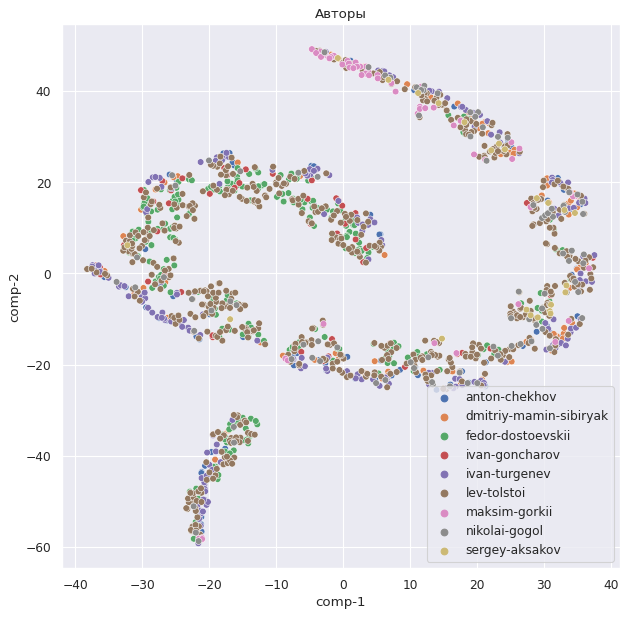

In [39]:
X = books

y = authors_data

plt.figure(figsize=(9,9), dpi=80)
tsne = TSNE(n_components=2, learning_rate=20)
z = tsne.fit_transform(X)

d = pd.DataFrame()
d["y"] = y
d["comp-1"] = z[:,0]
d["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=d.y.tolist(), data=d).set(title="Авторы") 